In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os
import numpy as np
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import  Dropout, Reshape
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.initializers import glorot_uniform
from keras.models import Model

In [21]:
def reshaping(x):
  return np.reshape(x,(32,32))

a = np.load('/content/drive/MyDrive/cvpr dataset/train_data20.npz')
x_train, y_train = a['arr_0'], a['arr_1']

xx_train = list((map(reshaping,x_train)))
x_train_ = np.array(xx_train)


b = np.load('/content/drive/MyDrive/cvpr dataset/test_data.npz')
x_test, y_test = b['arr_0'], b['arr_1']

xx_test = list((map(reshaping,x_test)))
x_test_ = np.array(xx_test)

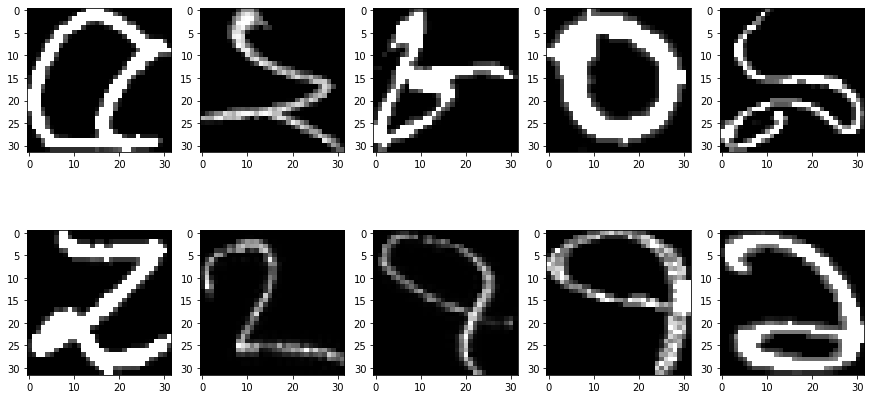

Labels : [[5]
 [2]
 [8]
 [0]
 [9]]
Labels : [[2]
 [2]
 [7]
 [7]
 [1]]


In [22]:
fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_train_[i], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_train_[i+6], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("Labels : {}".format(y_train[0:5]))
print("Labels : {}".format(y_train[6:11]))

In [23]:
# Normalizing the input
x_train_ = x_train_.astype('float32')
x_train_/=255

x_test_ = x_test_.astype('float32')
x_test_/=255

print(x_train_.shape)
print(x_test_.shape)

(54000, 32, 32)
(4000, 32, 32)


In [24]:
y_train_ = to_categorical(y_train, num_classes=10, dtype='float32')
y_test_ = to_categorical(y_test, num_classes=10, dtype='float32')

print("Train Set Size = {} images".format(y_train.shape[0]))
print("Test Set Size = {} images".format(y_test.shape[0]))

Train Set Size = 54000 images
Test Set Size = 4000 images


In [25]:
# load model
from keras import models    
model_new = models.load_model('/content/drive/MyDrive/model/vgg19_model.h5')
#set trainable false for pretrained model
for layer in model_new.layers[:-8]:
    layer.trainable = False

for l in model_new.layers:
    print(l.name, l.trainable)

input_1 False
zero_padding2d False
block1_conv1 False
batch_normalization False
activation False
block1_conv2 False
batch_normalization_1 False
activation_1 False
block1_pool False
block2_conv1 False
batch_normalization_2 False
activation_2 False
block2_conv2 False
batch_normalization_3 False
activation_3 False
block2_pool False
block3_conv1 False
batch_normalization_4 False
activation_4 False
block3_conv2 False
batch_normalization_5 False
activation_5 False
block3_conv3 False
batch_normalization_6 False
activation_6 False
block3_conv4 False
batch_normalization_7 False
activation_7 False
block3_pool False
block4_conv1 False
batch_normalization_8 False
activation_8 False
block4_conv2 False
batch_normalization_9 False
activation_9 False
block4_conv3 False
batch_normalization_10 False
activation_10 False
block4_conv4 False
batch_normalization_11 False
activation_11 False
block4_pool False
dropout True
flatten True
dropout_1 True
fc1 True
dropout_2 True
fc2 True
dropout_3 True
predictions 

In [26]:
model_new.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 38, 38, 1)        0         
 2D)                                                             
                                                                 
 block1_conv1 (Conv2D)       (None, 38, 38, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 38, 38, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 38, 38, 64)        0         
                                                                 
 block1_conv2 (Conv2D)       (None, 38, 38, 64)        36928 

In [27]:
optimizer = 'adam'
objective = 'categorical_crossentropy'

#extract layer weight
last_layer = model_new.get_layer('block3_pool')
last_output = last_layer.output

net = Dropout(rate=.2)(last_output)
net = Flatten()(net)
net = Dropout(rate=.5)(net)

net = Dense(2048, activation='relu', name='fc')(net)
net = Dropout(rate=.2)(net)
net = Dense(1024, activation='relu', name='fc2')(net)
net = Dropout(rate=.2)(net)

net = Dense(10, activation='softmax', name='predictions_utl')(net)

# Create model
model_n = Model(inputs = model_new.input, outputs = net, name='vgg19_utl')
model_n.compile(optimizer=optimizer, loss=objective, metrics=['accuracy'])

model_n.summary()

Model: "vgg19_utl"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 38, 38, 1)        0         
 2D)                                                             
                                                                 
 block1_conv1 (Conv2D)       (None, 38, 38, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 38, 38, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 38, 38, 64)        0         
                                                                 
 block1_conv2 (Conv2D)       (None, 38, 38, 64)        36

In [28]:
for l in model_n.layers:
    print(l.name, l.trainable)

input_1 False
zero_padding2d False
block1_conv1 False
batch_normalization False
activation False
block1_conv2 False
batch_normalization_1 False
activation_1 False
block1_pool False
block2_conv1 False
batch_normalization_2 False
activation_2 False
block2_conv2 False
batch_normalization_3 False
activation_3 False
block2_pool False
block3_conv1 False
batch_normalization_4 False
activation_4 False
block3_conv2 False
batch_normalization_5 False
activation_5 False
block3_conv3 False
batch_normalization_6 False
activation_6 False
block3_conv4 False
batch_normalization_7 False
activation_7 False
block3_pool False
dropout_4 True
flatten_1 True
dropout_5 True
fc True
dropout_6 True
fc2 True
dropout_7 True
predictions_utl True


In [29]:
nb_epoch = 100
batch_size = 32

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

ret = model_n.fit(x_train_.reshape((-1,32,32,1)), y_train_, 
                  epochs=nb_epoch, batch_size=batch_size, verbose=1,
                  #validation_split=0.3,
                  validation_data=(x_test_, y_test_),
                  callbacks=[es])

Epoch 1/100
1688/1688 [==============================] - 39s 23ms/step - loss: 0.2218 - accuracy: 0.9409 - val_loss: 0.0705 - val_accuracy: 0.9785
Epoch 2/100
1688/1688 [==============================] - 37s 22ms/step - loss: 0.1188 - accuracy: 0.9658 - val_loss: 0.0609 - val_accuracy: 0.9800
Epoch 3/100
1688/1688 [==============================] - 38s 23ms/step - loss: 0.1045 - accuracy: 0.9706 - val_loss: 0.0680 - val_accuracy: 0.9775
Epoch 4/100
1688/1688 [==============================] - 38s 23ms/step - loss: 0.1028 - accuracy: 0.9728 - val_loss: 0.0441 - val_accuracy: 0.9847
Epoch 5/100
1688/1688 [==============================] - 38s 23ms/step - loss: 0.0918 - accuracy: 0.9762 - val_loss: 0.0480 - val_accuracy: 0.9822
Epoch 6/100
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0880 - accuracy: 0.9769 - val_loss: 0.0493 - val_accuracy: 0.9845
Epoch 7/100
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0889 - accuracy: 0.9776 - val_loss: 0

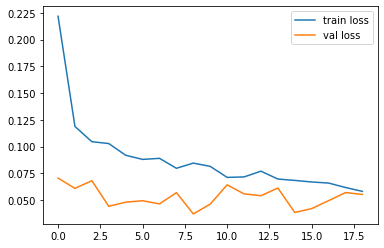

In [30]:
plt.plot(ret.history['loss'], label='train loss')
plt.plot(ret.history['val_loss'], label='val loss')
plt.legend()
plt.show()

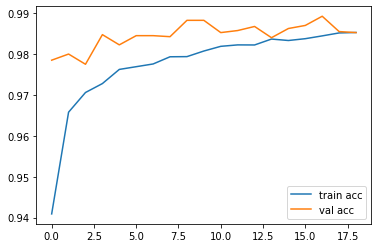

In [31]:
plt.plot(ret.history['accuracy'], label='train acc')
plt.plot(ret.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [32]:
# evaluate the model
_, train_acc = model_n.evaluate(x_train_, y_train_, verbose=0)
_, test_acc = model_n.evaluate(x_test_, y_test_, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))

Train accuracy: 0.995, Test accuracy: 0.985


In [33]:
predictions = model_n.predict(x_test_.reshape((-1,32,32,1)), verbose=0)

In [34]:
def test_accuracy():
    err = []
    t = 0
    for i in range(predictions.shape[0]):
        if (np.argmax(predictions[i]) == y_test[i]):
            t = t+1
        else:
            err.append(i)
    return t, float(t)*100/predictions.shape[0], err

In [35]:
p = test_accuracy()
print("Test accuracy: {} %".format(p[1]))

Test accuracy: 98.525 %


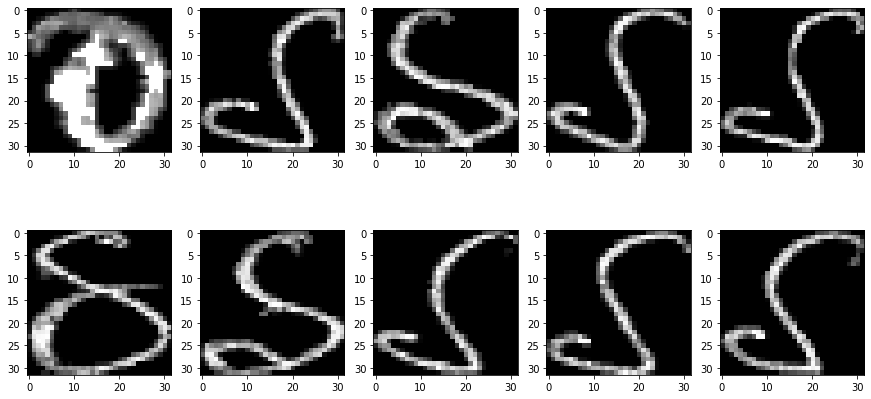

True:          [[0]
 [1]
 [1]
 [1]
 [1]]
classified as: [9 9 9 9 9]
True:          [[1]
 [1]
 [1]
 [1]
 [1]]
classified as: [4 9 9 9 9]


In [36]:
fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_test_[p[2][i]], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_test_[p[2][i+6]], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("True:          {}".format(y_test[p[2][0:5]]))
print("classified as: {}".format(np.argmax(predictions[p[2][0:5]], axis=1)))

print("True:          {}".format(y_test[p[2][6:11]]))
print("classified as: {}".format(np.argmax(predictions[p[2][6:11]], axis=1)))